### Sorting imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

### Reading in data

In [2]:
movie_data = pd.read_csv('cleaned data/movieData_with_languages_and_genres.csv')

### Cleaning data (dropping columns, correcting types etc)

In [3]:
movie_data = movie_data[movie_data['budget'] > 0]
movie_data = movie_data[movie_data['revenue'] > 0]

movie_data = movie_data[np.isfinite(movie_data['revenue'])]
movie_data = movie_data[np.isfinite(movie_data['runtime'])]

movie_data["genre"] = movie_data["genre"].astype(str)
movie_data['profit_made'] = (movie_data.revenue -movie_data.budget) 
movie_data["Normalized_profit"] = ((movie_data['revenue'] - movie_data['budget'])/movie_data['budget'])
movie_data['release_date'] = pd.to_datetime(movie_data.release_date)
movie_data['year'] = movie_data.release_date.dt.year
movie_data['year_group'] = movie_data.release_date.map(lambda date: date.year//4*4)

In [4]:
min_date = '1996-01-01 00:00:00'
valid_date = (movie_data['release_date'] > min_date)
movie_data = movie_data[valid_date]

#### Total profit made by genre

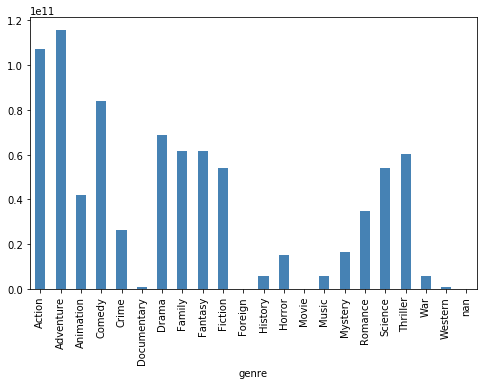

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
movie_data.groupby(['genre'])['profit_made'].sum().plot(kind='bar', color='steelblue', ax=ax)

#### Total money spent on each genre 

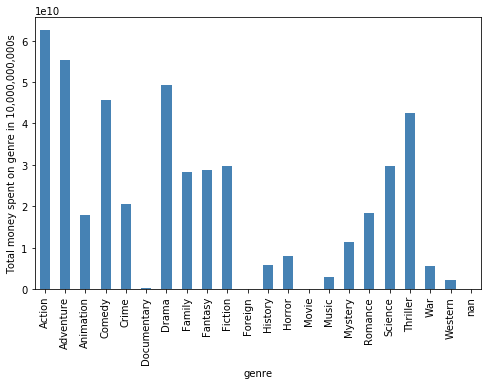

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel("Total money spent on genre in 10,000,000,000s")
movie_data.groupby(['genre'])['budget'].sum().plot(kind='bar', color='steelblue', ax=ax)

For this I took the 5 variables that would be good indications of how popular or unpopular a film was: revenue, budget, vote_average, vote_count and popularity. I ordered the genres regarding each of these variables to see which genres were consistently coming out on top (say top 5 genres in terms of each variable). I then plotted these genres against the variables I chose 

In [7]:
df = movie_data.groupby('genre').vote_average.mean().reset_index()
df.sort_values(by='vote_average').tail(5)

,genre,vote_average
2,Animation,6.426160
6,Drama,6.465287
5,Documentary,6.572000
19,War,6.655556
11,History,6.748366


In [8]:
df = movie_data.groupby('genre').budget.mean().reset_index()
df.sort_values(by='budget').tail(5)

,genre,budget
17,Science,6.850486e+07
7,Family,7.096196e+07
2,Animation,7.503485e+07
8,Fantasy,7.825929e+07
1,Adventure,8.264994e+07


In [9]:
df = movie_data.groupby('genre').popularity.mean().reset_index()
df.sort_values(by='popularity').tail(6)

,genre,popularity
7,Family,13.874306
9,Fiction,14.918376
17,Science,14.918376
2,Animation,15.356697
8,Fantasy,15.490441
1,Adventure,15.824632


In [10]:
df = movie_data.groupby('genre').vote_count.mean().reset_index()
df.sort_values(by='vote_count').tail(6)

,genre,vote_count
2,Animation,1316.476793
0,Action,1326.363992
8,Fantasy,1630.744565
1,Adventure,1733.717910
17,Science,1760.202299
9,Fiction,1760.202299


In [11]:
df = movie_data.groupby('genre').revenue.mean().reset_index()
df.sort_values(by='revenue').tail(5)

,genre,revenue
17,Science,1.929089e+08
7,Family,2.260301e+08
8,Fantasy,2.455572e+08
2,Animation,2.518962e+08
1,Adventure,2.551501e+08


Unnecessary to show this graph as it's just a representation of the above table, but could be interesting to look at later

In [12]:
#fig, ax = plt.subplots(figsize=(15, 10))
#movieData.groupby(['genre']).revenue.mean().plot(kind='bar', color='steelblue', ax=ax)

In [13]:
def mean_genre_profit(start_year, end_year, genre, movie_data):
    has_budget = (movie_data['budget'] > 0)
    has_revenue = (movie_data['revenue'] > 0)
    is_correct_genre = (movie_data['genre'] == genre)
    is_correct_year = (movie_data['year'] >= start_year) & (movie_data['year'] < end_year)
    movie_data = movie_data[is_correct_year]
    movie_data = movie_data[is_correct_genre]
    movie_data = movie_data[has_budget]
    movie_data = movie_data[has_revenue]
    
    movie_data.groupby('year')['Normalized_profit'].plot()

I wanted to make a grouped bar chart showing the voet count/average, popularity, budget and revenue of all genres, but there was too much data to show, so I found the movie genres that had the biggest mean() values of those variables, I'll make a dataframe containing movies from just those genres and make a grouped bar chart from that.

In [14]:
best_movies = movie_data
best_movies = best_movies[~best_movies['genre'].isin(['Horror', 'Comedy', 'Fiction', 'Movie', 'History', 'War', 'Crime', 'Documentary', 'Drama', 'Action', 'Music', 'Mystery', 'Romance', 'nan', 'Foreign', 'Thriller', 'War', 'Western'])]

I did take out one outlier in this dataframe, the adventure movie "The Tiger: An Old Hunter's Tale" with a Normalized_profit value of 2216.

In [15]:
best_movies = best_movies.drop(best_movies[best_movies.Normalized_profit > 20].index)

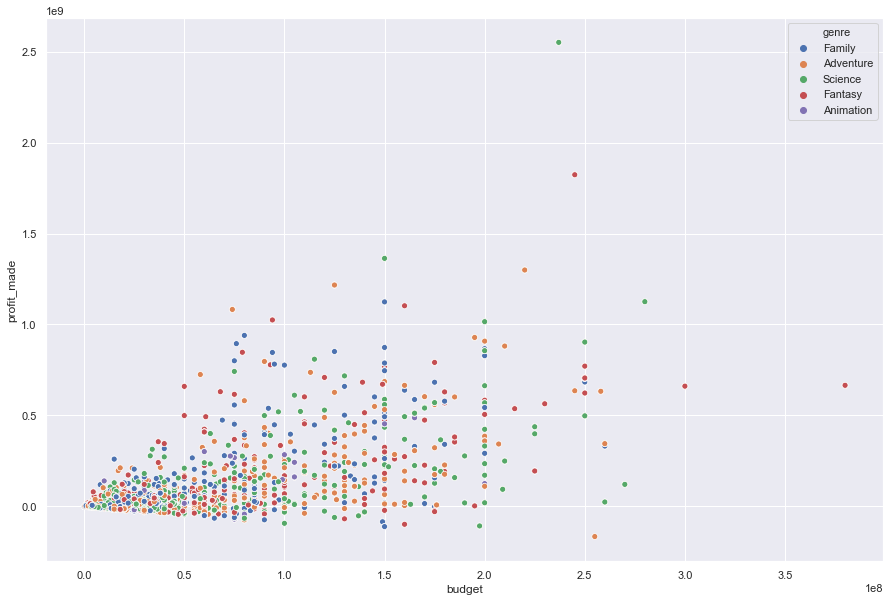

In [16]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})
g = sns.scatterplot(x="budget", y = "profit_made", hue="genre", data=best_movies, ci=False)

In [17]:
#fig, ax = plt.subplots(figsize=(8, 5))

#best_movies.groupby('genre')['profit_made'].mean().plot('')
print (best_movies.groupby(['genre', 'profit_made', 'budget'], as_index=False))
#spent = best_movies.groupby('genre')['budget'].mean().plot(kind='bar')

#### I decided to go with a line graph to represent this data. One reason for this is because it's plotting the values of some set of attributes over time, also I think it makes it easier to measure the values of the different lines at different points on the x axis, which would be more difficult with a stacked area chart. It's also easier to see which genres are ahead of others at what time in nthis chart than with a multi bar chart.

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


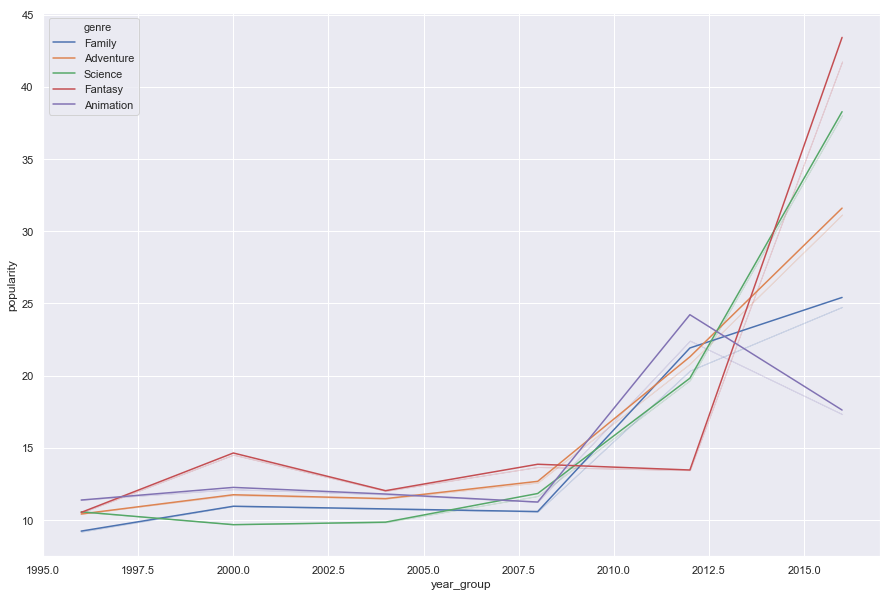

In [18]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})
g = sns.lineplot(x="year_group", y = "popularity", hue="genre", data=best_movies, ci=False)

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


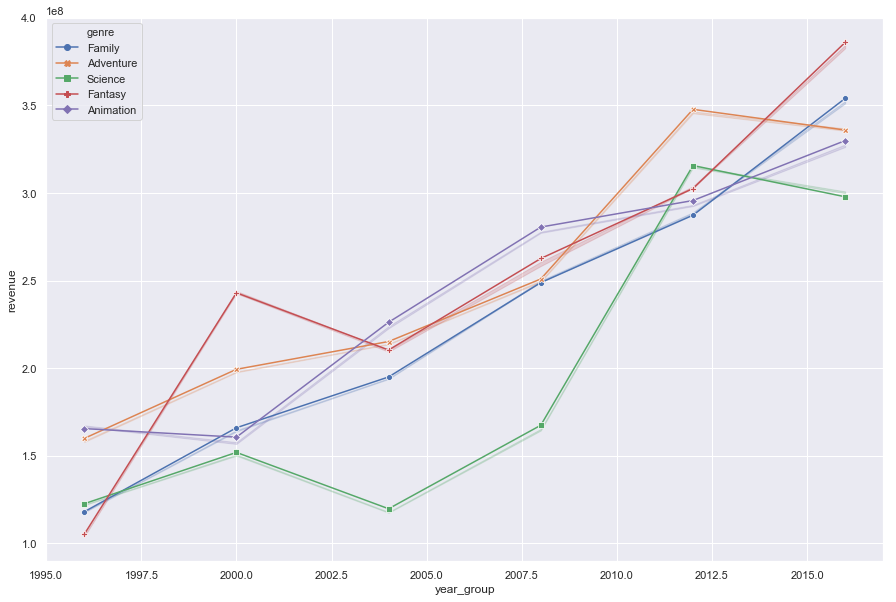

In [25]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})
g = sns.lineplot(x="year_group", y = "revenue", hue="genre", style="genre", dashes=False, markers=True, data=best_movies, ci=True)

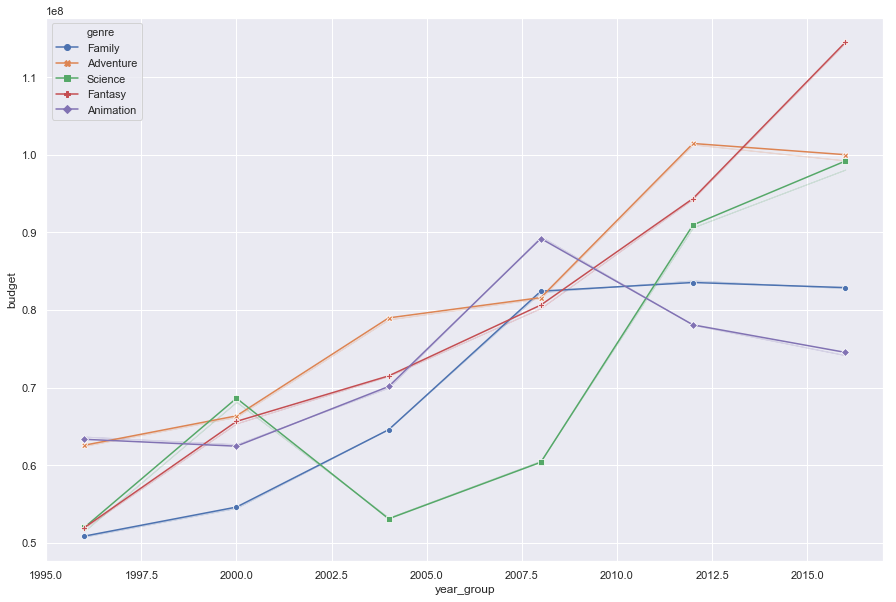

In [26]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})
g = sns.lineplot(x="year_group", y = "budget", hue="genre", style="genre", dashes=False, markers=True, data=best_movies, ci=False)

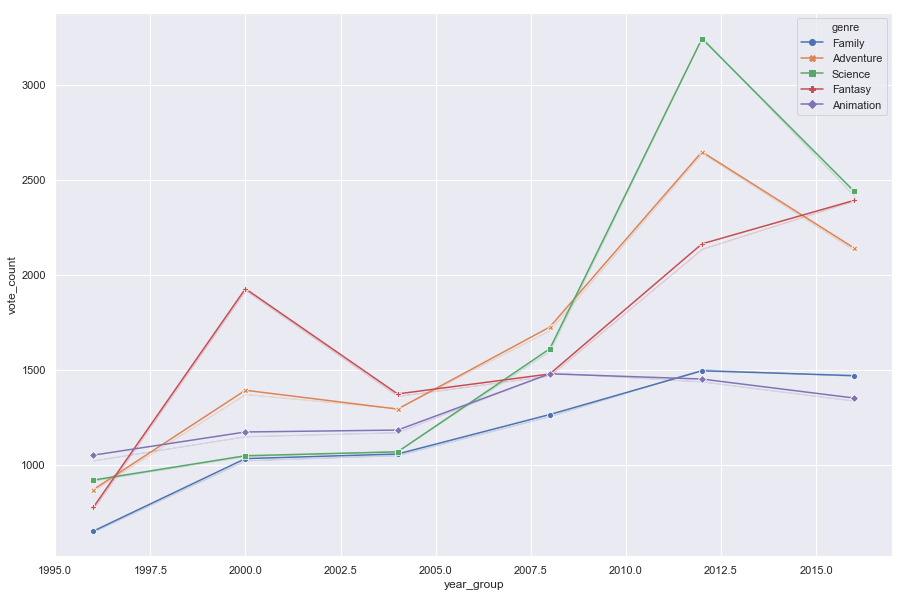

In [27]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})
g = sns.lineplot(x="year_group", y = "vote_count", hue="genre", style="genre", dashes=False, markers=True, data=best_movies, ci=False)

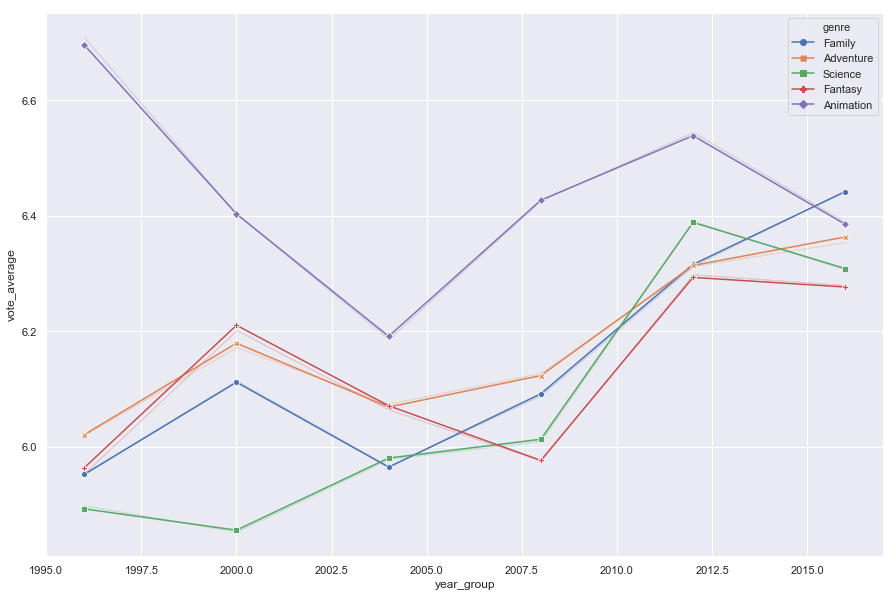

In [28]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})
g = sns.lineplot(x="year_group", y = "vote_average", hue="genre", style="genre", dashes=False, markers=True, data=best_movies, ci=False)

Text(0, 0.5, 'Mean Movie Profit as a percentage of Budget')

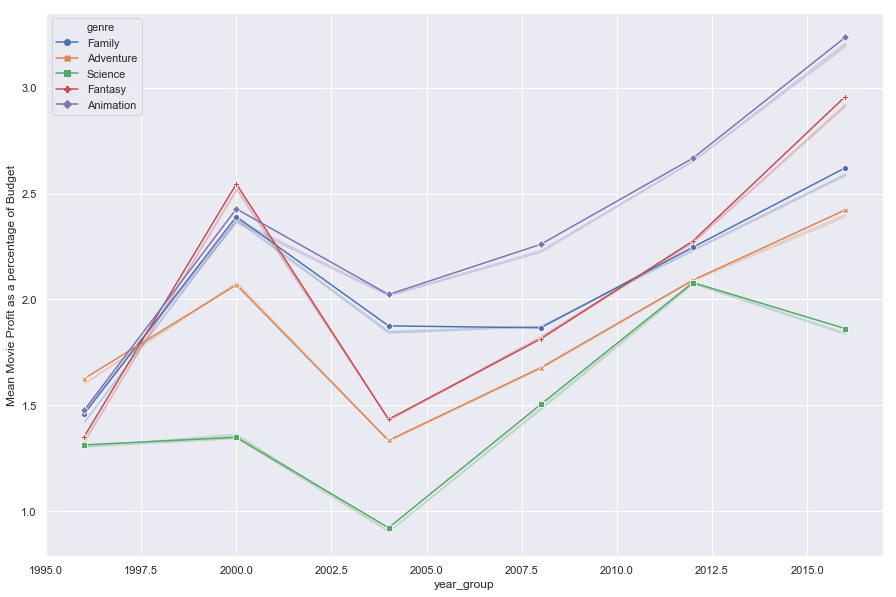

In [29]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 10)})
g = sns.lineplot(x="year_group", y = "Normalized_profit", hue="genre", style="genre", dashes=False, markers=True, data=best_movies, ci=True)
plt.ylabel("Mean Movie Profit as a percentage of Budget")